# Comparative Evaluation of Machine Learning Models: Neural Networks, SVM, and Random Forest
---
In this notebook, we will perform a comprehensive evaluation of three popular machine learning models: Neural Networks, Support Vector Machines (SVM), and Random Forest. These models will be tested on the validation dataset (10% of the entire dataset, 1000 instances), and we will analyze their performance using various evaluation metrics such as confusion matrices, classification reports, and accuracy scores.

The goal is to understand how each model performs in terms of key classification metrics and provide insights into which model best suits the problem at hand. By comparing these models, we can highlight their strengths, weaknesses, and applicability to different types of data. This notebook aims to give a clear and visual understanding of how these models differ in their approach and effectiveness for classification tasks.

## **Loading The Data**

### Importing Required Libraries

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import pickle

### Loading Validation Data From CSV File

In [9]:
data = pd.read_csv('../Data/validation_dataset.csv')  
data.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Class
0,0.081546,-0.801783,-1.037828,-1.480850,0.926351,-0.182794,0.357295,-1.083902,0.851105,0.083213,...,0.051561,-0.194943,-0.244506,-0.143106,-0.263665,-0.408418,-1.885802,-0.042930,1.175097,1
1,-0.280103,-0.271264,-0.431566,1.285697,-0.049563,-3.713341,3.942434,-0.323473,0.997299,0.473384,...,1.671700,-1.503691,-0.000270,0.352333,1.312137,2.473517,1.987936,-0.371570,-0.152840,0
2,1.401293,-1.170002,-1.910623,-1.678237,-1.331836,-0.262826,-0.239188,-2.760731,0.980949,-0.749548,...,0.227508,-0.222122,0.164042,1.212141,-0.439288,-0.845043,-0.726364,-0.609433,2.827499,1
3,1.028631,2.510518,-2.487426,-1.320138,-0.626425,0.519601,-0.337771,0.985315,-0.002516,-0.718990,...,-4.737764,-1.080200,1.218489,-0.105760,1.902067,0.346028,0.582876,-0.911432,0.091329,1
4,-1.468179,0.814316,-1.355822,1.182153,0.631140,-0.987539,-2.478349,1.939424,-1.795490,1.060939,...,0.292558,-0.706161,1.391773,-1.418970,-1.198434,-2.238392,0.790045,-0.217661,2.090368,0


### Dataset Information 

In [10]:
# Dataset information: shape, Null values, and data types
print(f"Dataset Shape: {data.shape}")
print(f"Data Types:\n{data.dtypes}")
print(f"Missing Values:\n{data.isnull().sum()}")

Dataset Shape: (1000, 21)
Data Types:
Feature_1     float64
Feature_2     float64
Feature_3     float64
Feature_4     float64
Feature_5     float64
Feature_6     float64
Feature_7     float64
Feature_8     float64
Feature_9     float64
Feature_10    float64
Feature_11    float64
Feature_12    float64
Feature_13    float64
Feature_14    float64
Feature_15    float64
Feature_16    float64
Feature_17    float64
Feature_18    float64
Feature_19    float64
Feature_20    float64
Class           int64
dtype: object
Missing Values:
Feature_1     0
Feature_2     0
Feature_3     0
Feature_4     0
Feature_5     0
Feature_6     0
Feature_7     0
Feature_8     0
Feature_9     0
Feature_10    0
Feature_11    0
Feature_12    0
Feature_13    0
Feature_14    0
Feature_15    0
Feature_16    0
Feature_17    0
Feature_18    0
Feature_19    0
Feature_20    0
Class         0
dtype: int64



Class Distribution:
Class
1    296
0    295
3    205
2    204
Name: count, dtype: int64


/tmp/ipykernel_76425/1057298849.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='viridis')


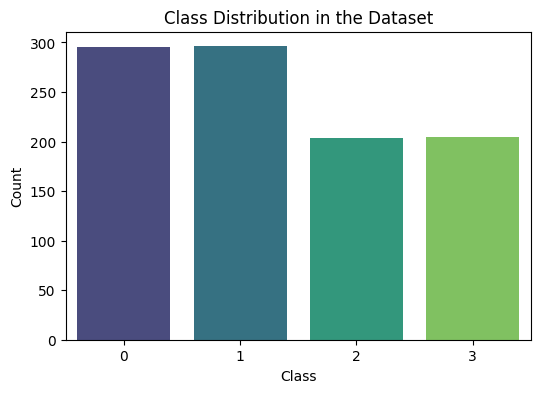

In [12]:
# Distribution of classes in the target variable
class_distribution = y.value_counts()
print(f"\nClass Distribution:\n{class_distribution}")

# Visualize the distribution of classes using a bar plot
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette='viridis')
plt.title('Class Distribution in the Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### Dataset PreProcessing

In [11]:
X = data.drop('Class', axis=1)
y = data['Class'] 

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## **Loading the Models**

### Importing Required Libraries

In [19]:
# Import necessary libraries for model loading and evaluation
import pickle
from sklearn.metrics import confusion_matrix, classification_report
from joblib import load
import matplotlib.pyplot as plt
import seaborn as sns

### 2.2 Loading the Models

In [23]:
# Load the trained models
nn_model = load("../Models/Neural_Network.pkl")
rf_model = load("../Models/random_forest.pkl")
svm_model = load("../Models/svm_model.joblib")

# Check if models are loaded correctly
print("Models loaded successfully!")

Models loaded successfully!


### 2.3 Verify the Models' Structure

In [24]:
# Check the structure of each model
print(f"Neural Network Model: {nn_model}")
print(f"SVM Model: {svm_model}")
print(f"Random Forest Model: {rf_model}")

Neural Network Model: MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=1000,
              random_state=42)
SVM Model: SVC(C=1, gamma=0.1, random_state=42)
Random Forest Model: RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)


## **Model Evaluation**

### 3.1 Importing Required Libraries

In [25]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

### 3.2 Evaluating the Models: Confusion Matrix and Classification Report

In [26]:
# Function to evaluate a model: confusion matrix and classification report
def evaluate_model(model, X_test, y_test, model_name):
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Classification Report
    class_report = classification_report(y_test, y_pred)
    
    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    # Print Classification Report
    print(f"Classification Report for {model_name}:\n")
    print(class_report)

    return cm, class_report

### 3.3 Evaluate Neural Network Model

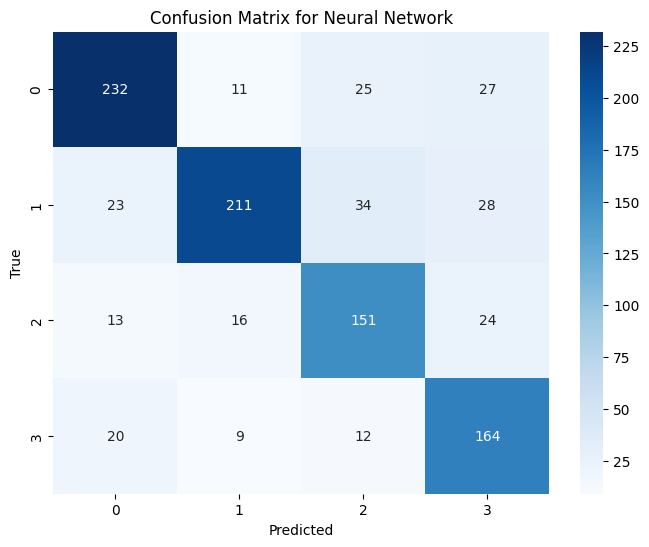

Classification Report for Neural Network:

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       295
           1       0.85      0.71      0.78       296
           2       0.68      0.74      0.71       204
           3       0.67      0.80      0.73       205

    accuracy                           0.76      1000
   macro avg       0.75      0.76      0.75      1000
weighted avg       0.77      0.76      0.76      1000



(array([[232,  11,  25,  27],
        [ 23, 211,  34,  28],
        [ 13,  16, 151,  24],
        [ 20,   9,  12, 164]]),
 '              precision    recall  f1-score   support\n\n           0       0.81      0.79      0.80       295\n           1       0.85      0.71      0.78       296\n           2       0.68      0.74      0.71       204\n           3       0.67      0.80      0.73       205\n\n    accuracy                           0.76      1000\n   macro avg       0.75      0.76      0.75      1000\nweighted avg       0.77      0.76      0.76      1000\n')

In [30]:
# Evaluate the Neural Network model
evaluate_model(nn_model, X_scaled, y, "Neural Network")

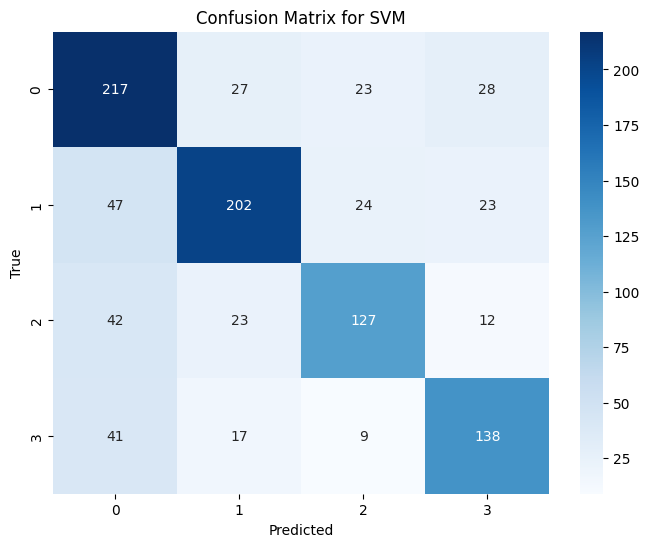

Classification Report for SVM:

              precision    recall  f1-score   support

           0       0.63      0.74      0.68       295
           1       0.75      0.68      0.72       296
           2       0.69      0.62      0.66       204
           3       0.69      0.67      0.68       205

    accuracy                           0.68      1000
   macro avg       0.69      0.68      0.68      1000
weighted avg       0.69      0.68      0.68      1000



(array([[217,  27,  23,  28],
        [ 47, 202,  24,  23],
        [ 42,  23, 127,  12],
        [ 41,  17,   9, 138]]),
 '              precision    recall  f1-score   support\n\n           0       0.63      0.74      0.68       295\n           1       0.75      0.68      0.72       296\n           2       0.69      0.62      0.66       204\n           3       0.69      0.67      0.68       205\n\n    accuracy                           0.68      1000\n   macro avg       0.69      0.68      0.68      1000\nweighted avg       0.69      0.68      0.68      1000\n')

In [34]:
# Evaluate the SVM
evaluate_model(svm_model, X_scaled, y, "SVM")

/home/hakou/AMSD/Python/Code/Machine_learning_Classification/venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


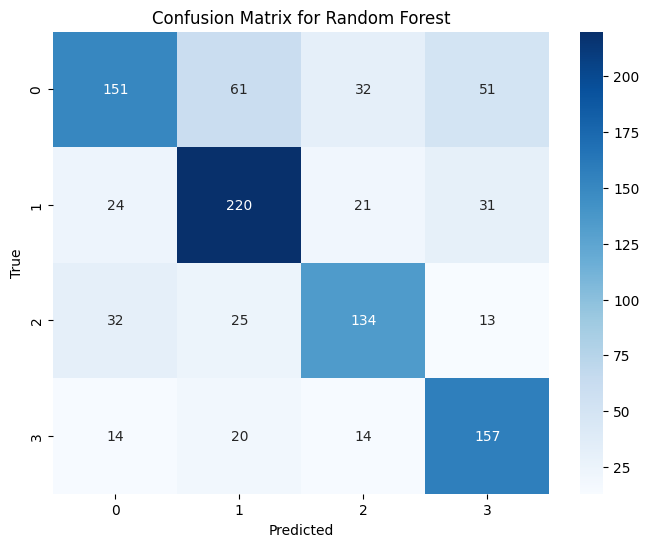

Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.68      0.51      0.59       295
           1       0.67      0.74      0.71       296
           2       0.67      0.66      0.66       204
           3       0.62      0.77      0.69       205

    accuracy                           0.66      1000
   macro avg       0.66      0.67      0.66      1000
weighted avg       0.67      0.66      0.66      1000



(array([[151,  61,  32,  51],
        [ 24, 220,  21,  31],
        [ 32,  25, 134,  13],
        [ 14,  20,  14, 157]]),
 '              precision    recall  f1-score   support\n\n           0       0.68      0.51      0.59       295\n           1       0.67      0.74      0.71       296\n           2       0.67      0.66      0.66       204\n           3       0.62      0.77      0.69       205\n\n    accuracy                           0.66      1000\n   macro avg       0.66      0.67      0.66      1000\nweighted avg       0.67      0.66      0.66      1000\n')

In [32]:
# Evaluate the Neural Network model
evaluate_model(rf_model, X_scaled, y, "Random Forest")

## 4 Comparison Between Models

### 4.1 Importing Required Libraries

In [35]:
from sklearn.metrics import accuracy_score

### 4.2 Define Model Comparison Function

In [36]:
# Function to compare multiple models
def compare_all_models(models, model_names, X_test, y_test):
    # Initialize lists to store metrics for comparison
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    
    # Evaluate each model and store the metrics
    for model, model_name in zip(models, model_names):
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        
        # Get classification report
        class_report = classification_report(y_test, y_pred, output_dict=True)
        
        # Extract precision, recall, f1-score for the class 'macro avg'
        precisions.append(class_report['macro avg']['precision'])
        recalls.append(class_report['macro avg']['recall'])
        f1_scores.append(class_report['macro avg']['f1-score'])
        
        # Print detailed report
        print(f"\nClassification Report for {model_name}:\n")
        print(classification_report(y_test, y_pred))
    
    # Create a DataFrame for comparison
    comparison_df = pd.DataFrame({
        'Model': model_names,
        'Accuracy': accuracies,
        'Precision': precisions,
        'Recall': recalls,
        'F1-Score': f1_scores
    })
    
    # Display comparison as a table
    print("\nModel Comparison Summary:\n")
    print(comparison_df)

    # Plot comparison as bar charts
    comparison_df.set_index('Model').plot(kind='bar', figsize=(10, 6), colormap='viridis')
    plt.title('Model Comparison - Accuracy, Precision, Recall, F1-Score')
    plt.ylabel('Scores')
    plt.xlabel('Models')
    plt.xticks(rotation=45)
    plt.show()

    return comparison_df

### 4.3 Comparing the Models' Performance


Classification Report for Neural Network:

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       295
           1       0.85      0.71      0.78       296
           2       0.68      0.74      0.71       204
           3       0.67      0.80      0.73       205

    accuracy                           0.76      1000
   macro avg       0.75      0.76      0.75      1000
weighted avg       0.77      0.76      0.76      1000


Classification Report for Support Vector Machine:

              precision    recall  f1-score   support

           0       0.63      0.74      0.68       295
           1       0.75      0.68      0.72       296
           2       0.69      0.62      0.66       204
           3       0.69      0.67      0.68       205

    accuracy                           0.68      1000
   macro avg       0.69      0.68      0.68      1000
weighted avg       0.69      0.68      0.68      1000


Classification Report for Random 

/home/hakou/AMSD/Python/Code/Machine_learning_Classification/venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


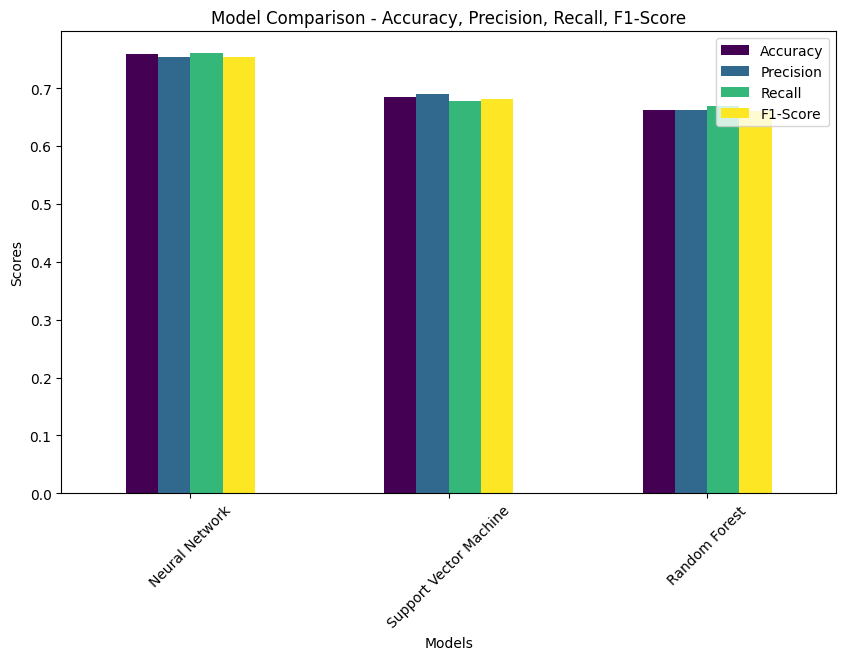

In [38]:
# Models and their names
models = [nn_model, svm_model, rf_model]
model_names = ["Neural Network", "Support Vector Machine", "Random Forest"]

# Compare the performance of all models
comparison_df = compare_all_models(models, model_names, X_scaled, y)
